In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import matplotlib
matplotlib.rcParams['font.family']='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] = False


In [2]:
data = {'aa':10,'bb':20,'cc':30,'dd':40,'ee':50}
sr = pd.Series(data, name='국어점수')
sr


aa    10
bb    20
cc    30
dd    40
ee    50
Name: 국어점수, dtype: int64

In [3]:
sr.sum()

150

In [4]:
sr.min()

10

In [5]:
sr.max()

50

In [6]:
sr.idxmax() #가장 큰 값의 인덱스

'ee'

In [7]:
sr.idxmin() #가장 작은 값의 인덱스

'aa'

In [9]:
# 45이하인 데이터의 가장 큰 값
sr[sr<=45].max()

40

In [10]:
sr.mean()

30.0

In [12]:
sr.nlargest(n=3)  # top 3 출력

ee    50
dd    40
cc    30
Name: 국어점수, dtype: int64

In [13]:
sr['cc'] = 40

In [14]:
sr.nlargest(n=2) # 같은 값이 있으면 먼저 선언된 값이 출력. keep 인자 디폴트 값이 first

ee    50
cc    40
Name: 국어점수, dtype: int64

In [15]:
sr.nlargest(n=2, keep='all') # 같은 값 있으면 전부 다 출력

ee    50
cc    40
dd    40
Name: 국어점수, dtype: int64

In [16]:
sr.nsmallest(2)

aa    10
bb    20
Name: 국어점수, dtype: int64

In [17]:
sr.head(n=2)

aa    10
bb    20
Name: 국어점수, dtype: int64

In [18]:
sr.tail(n=2)

dd    40
ee    50
Name: 국어점수, dtype: int64

In [19]:
sr.var() #분산

270.0

In [20]:
sr.std() #표준편차

16.431676725154983

In [21]:
sr.median()  #중앙값

40.0

In [22]:
sr.quantile(q=[0.25,0.5,0.75]) # percentile 은 없음

0.25    20.0
0.50    40.0
0.75    40.0
Name: 국어점수, dtype: float64

In [23]:
sr.unique()  # arrary로 나옴 . 중복X

array([10, 20, 40, 50], dtype=int64)

In [24]:
sr.value_counts() # 각각 개수

40    2
10    1
20    1
50    1
Name: 국어점수, dtype: int64

In [25]:
def fn(v):
    print ('='*10)
    print(v)
    print('='*10)
    return v+2


In [27]:
def fn(v):
    if v <=30:
        return v+2
    else:
        return v+1

In [30]:
def fn(v):
    return v+2 if v<=30 else v+1

In [31]:
# sr.map
sr.apply(fn)

aa    12
bb    22
cc    41
dd    41
ee    51
Name: 국어점수, dtype: int64

In [32]:
sr.apply(lambda v:v+2 if v <=30 else v+1)

aa    12
bb    22
cc    41
dd    41
ee    51
Name: 국어점수, dtype: int64

In [33]:
# 국어점수가 40점 이상이면 '합격'아니면 '불합격'으로 구하시오
sr.apply( lambda v : '합격' if v>=40 else '불합격')

aa    불합격
bb    불합격
cc     합격
dd     합격
ee     합격
Name: 국어점수, dtype: object

In [34]:
pd.cut(sr,bins=5) # 데이터를 5개의 계급으로 나눠 어디에 속하는지 보여줌

aa    (9.96, 18.0]
bb    (18.0, 26.0]
cc    (34.0, 42.0]
dd    (34.0, 42.0]
ee    (42.0, 50.0]
Name: 국어점수, dtype: category
Categories (5, interval[float64]): [(9.96, 18.0] < (18.0, 26.0] < (26.0, 34.0] < (34.0, 42.0] < (42.0, 50.0]]

In [35]:
pd.cut(sr,bins=[0,20,40,60]) # 3개의 계급으로 나눠 어디에 속하는지 보여줌

aa     (0, 20]
bb     (0, 20]
cc    (20, 40]
dd    (20, 40]
ee    (40, 60]
Name: 국어점수, dtype: category
Categories (3, interval[int64]): [(0, 20] < (20, 40] < (40, 60]]

In [36]:
pd.cut(sr,bins=[0,20,40,60],labels=['C','B','A']) # 계급의 이름을 label로 설정

aa    C
bb    C
cc    B
dd    B
ee    A
Name: 국어점수, dtype: category
Categories (3, object): ['C' < 'B' < 'A']

In [37]:
pd.cut(sr,bins=[0,20,40,60],labels=['C','B','A']).value_counts() # 계급별 각각 몇 개인지 알려줌

C    2
B    2
A    1
Name: 국어점수, dtype: int64

In [40]:
sr.to_csv('a.csv')

In [41]:
for n in sr: #sr.values
    print(n)

10
20
40
40
50


In [42]:
for n in sr.index:
    print(n)

aa
bb
cc
dd
ee


In [43]:
for n in sr.items():
    print(n)

('aa', 10)
('bb', 20)
('cc', 40)
('dd', 40)
('ee', 50)


## 시각화

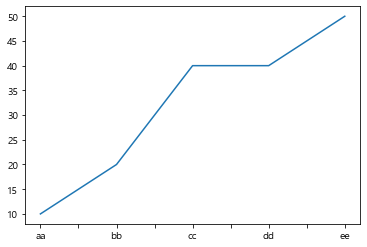

In [44]:
sr.plot() # 기본값 kind = 'line'
plt.show()

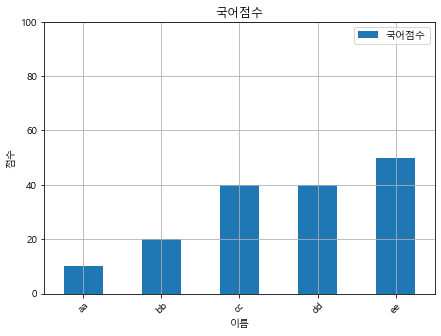

In [54]:
sr.plot(kind='bar',figsize = (7,5),title='국어점수',grid=True,legend=True, 
        ylim=(0,100),xlabel='이름',ylabel='점수', rot = 45)
plt.show()

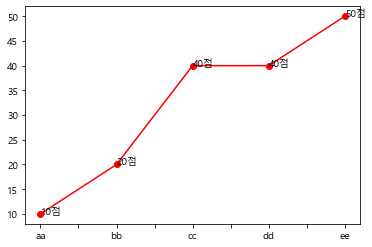

In [60]:
sr.plot(style='r-o')
# plt.text(0,10,'10점')
# plt.text(1,20,'20점')

for i in range(len(sr)):
    plt.text(i,sr.iloc[i],f'{sr.iloc[i]}점')
plt.show()

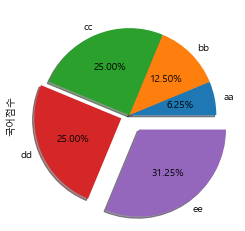

In [66]:
sr.plot(kind='pie', autopct='%.2f%%',shadow = True, explode=[0,0,0,0.1,0.2])  #비율
plt.show()